In [29]:
from tools.tools import open_file, DF_TIME, DF_DATA_POINTS, DF_CHANNEL
from hplc.io import load_chromatogram
from hplc.quant import Chromatogram

time = 'time'
signal = 'signal'

In [37]:
_testf = '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 10-09-35 AMSystem005.dat.asc'
infos, df_all = open_file(_testf)
df_all[DF_TIME] = df_all[DF_TIME] / 60

[<Figure size 640x480 with 1 Axes>, <Axes: xlabel='time', ylabel='signal'>]

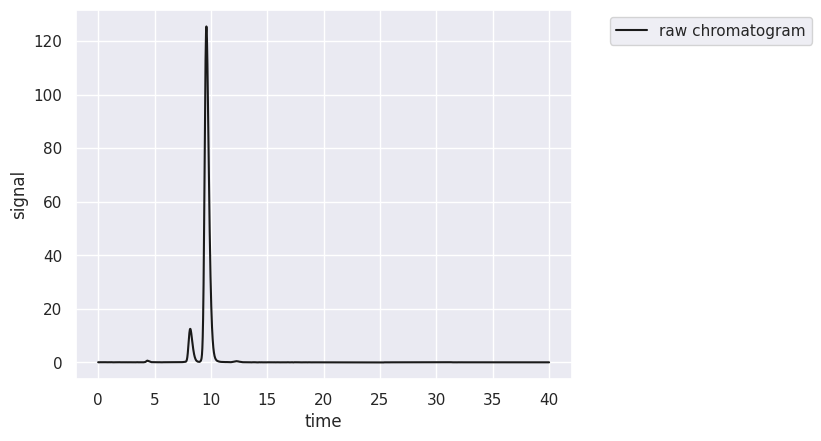

In [44]:
df = df_all.loc[df_all[DF_CHANNEL] == 0, [DF_TIME, DF_DATA_POINTS]].rename(columns={
    DF_TIME: time,
    DF_DATA_POINTS: signal,
})

chrom = Chromatogram(df)
chrom.show()

[<Figure size 640x480 with 1 Axes>, <Axes: xlabel='time', ylabel='signal'>]

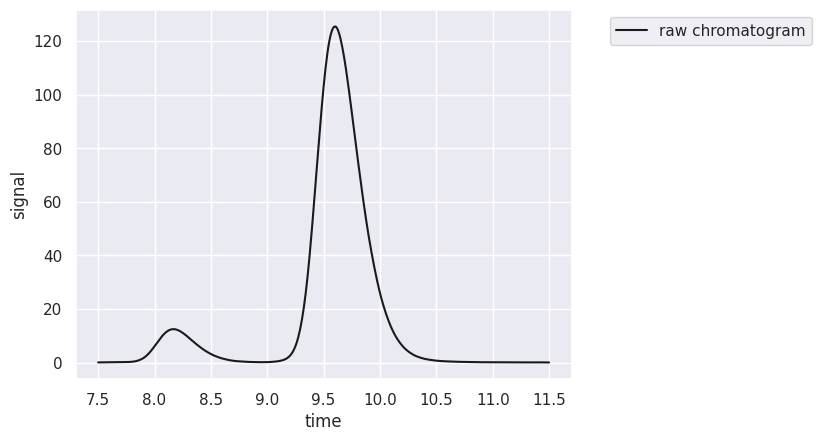

In [45]:
chrom.crop([7, 11.5])
chrom.show()

In [46]:
peaks = chrom.fit_peaks(buffer=0)
peaks

Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00, 58.18it/s]


,retention_time,scale,skew,amplitude,area,peak_id
0,8.03,0.258716,2.340157,5.185571,622.268561,1
0,9.45,0.286537,2.386611,57.647462,6917.695493,2


[<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='time', ylabel='signal (baseline corrected)'>]

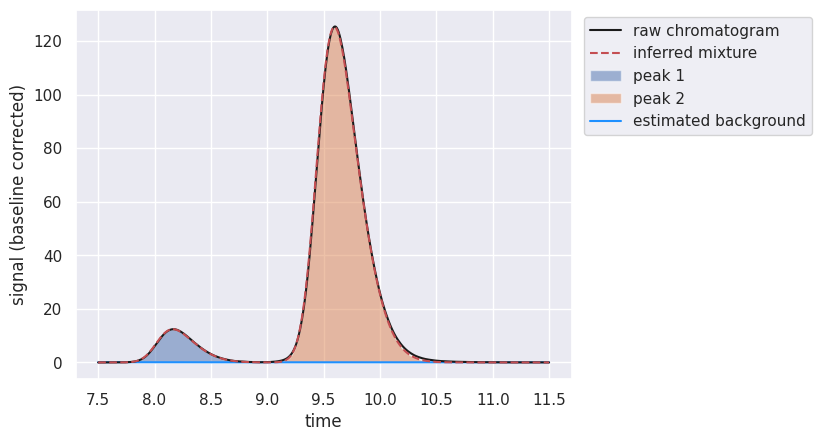

In [47]:
chrom.show()

In [48]:
scores = chrom.assess_fit()
scores


-------------------Chromatogram Reconstruction Report Card----------------------

Reconstruction of Peaks

A+, Success:  Peak Window 1 (t: 7.658 - 11.083) R-Score = 0.9930

Signal Reconstruction of Interpeak Windows
                  
C-, Needs Review:  Interpeak Window 1 (t: 7.500 - 7.650) R-Score = 0.9681 & Fano Ratio = 0.0001
Interpeak window 1 is not well reconstructed by mixture, but has a small Fano factor  
compared to peak region(s). This is likely acceptable, but visually check this region.

C-, Needs Review:  Interpeak Window 2 (t: 11.092 - 11.500) R-Score = 0.6005 & Fano Ratio = 0.0002
Interpeak window 2 is not well reconstructed by mixture, but has a small Fano factor  
compared to peak region(s). This is likely acceptable, but visually check this region.


--------------------------------------------------------------------------------


,window_id,time_start,time_end,signal_area,inferred_area,signal_variance,signal_mean,signal_fano_factor,reconstruction_score,window_type,applied_tolerance,status
0,1,7.500000,7.650000,1.038633,1.005493,0.000007,0.002033,0.003198,0.968093,interpeak,0.01,needs review
1,2,11.091667,11.500000,1.665372,1.000076,0.000127,0.013307,0.009528,0.600512,interpeak,0.01,needs review
0,1,7.658333,11.083333,7594.315041,7540.959317,1131.844167,18.430376,61.411886,0.992974,peak,0.01,valid


Deconvolving mixture: 100%|██████████| 3/3 [00:00<00:00, 90.32it/s]
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:955: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Lactate' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['peak_id'] == peak_id, 'compound'] = k
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:974: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'mM' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  peak_df.loc[peak_df['compound'] ==


0 0 
    retention_time     scale      skew   amplitude          area  peak_id
0            7.11  0.211833  3.735250    7.186147    861.163146        1
0            8.03  0.503349  9.929401    0.052535      6.304168        2
0            8.67  0.366774  2.226004  109.670951  13160.506829        3


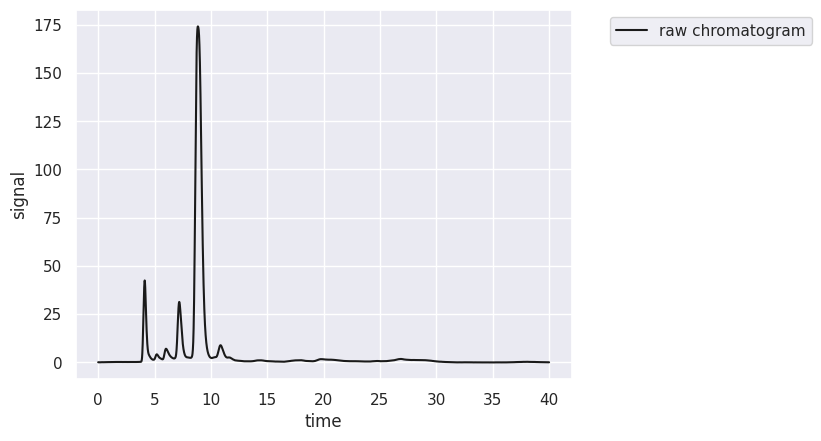

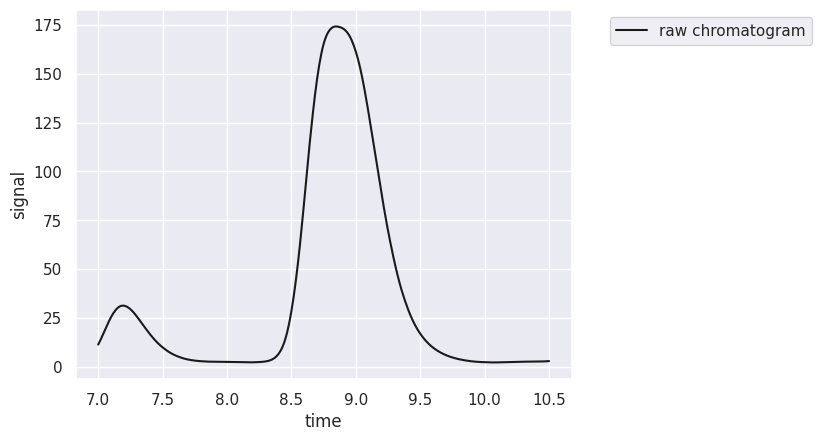

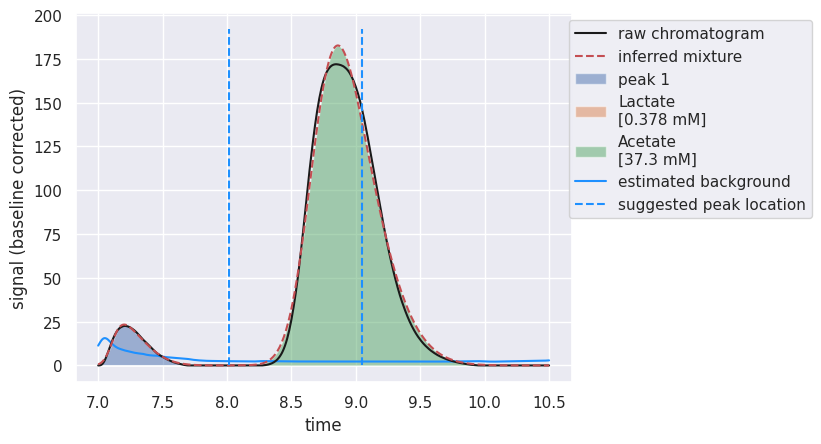

In [215]:
from tools.plot import plot_images
from tools.tools import open_file, DF_TIME, DF_DATA_POINTS, DF_CHANNEL
from hplc.quant import Chromatogram

time = 'time'
signal = 'signal'

for lac, ac, file in [
    # (20, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-10-2023 4-59-39 PMSystem001.dat.asc'),
    # (0, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-10-2023 5-42-41 PMSystem002.dat.asc'),
    # (15, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-10-2023 6-25-34 PMSystem003.dat.asc'),
    # (10, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-10-2023 7-08-29 PMSystem004.dat.asc'),
    # (5, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-10-2023 7-51-28 PMSystem005.dat.asc'),
    # (1, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-10-2023 8-34-26 PMSystem006.dat.asc'),
    # (0.5, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-10-2023 9-17-19 PMSystem007.dat.asc'),
    # (0.1, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-10-2023 10-00-13 PMSystem008.dat.asc'),
    # (0.01, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-10-2023 10-43-06 PMSystem009.dat.asc'),
    # (0, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-10-2023 11-25-58 PMSystem010.dat.asc'),
    # (0, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 12-08-49 AMSystem001.dat.asc'),
    # (0, 20, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 12-51-46 AMSystem002.dat.asc'),
    # (0, 15, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 1-34-45 AMSystem003.dat.asc'),
    # (0, 10, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 2-17-40 AMSystem004.dat.asc'),
    # (0, 5, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 3-00-32 AMSystem005.dat.asc'),
    # (0, 1, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 3-43-25 AMSystem006.dat.asc'),
    # (0, 0.5, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 4-26-18 AMSystem007.dat.asc'),
    # (0, 0.1, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 5-09-11 AMSystem008.dat.asc'),
    # (0, 0.01, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 5-52-04 AMSystem009.dat.asc'),
    # (0, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 6-35-02 AMSystem010.dat.asc'),
    # (0, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 7-17-57 AMSystem011.dat.asc'),
    # (20, 20, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 8-00-54 AMSystem002.dat.asc'),
    # (10, 10, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 8-43-49 AMSystem003.dat.asc'),
    # (5, 5, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 9-26-42 AMSystem004.dat.asc'),
    # (20, 1, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 10-09-35 AMSystem005.dat.asc'),
    # (1, 20, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 10-52-29 AMSystem006.dat.asc'),
    # (5, 15, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 11-35-20 AMSystem007.dat.asc'),
    # (15, 5, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 12-18-14 PMSystem008.dat.asc'),
    # (0.01, 20, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 1-01-11 PMSystem009.dat.asc'),
    # (20, 0.01, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 1-44-06 PMSystem010.dat.asc'),
    # (0, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231010_LActate_Acetate_Reference/10-11-2023 2-26-59 PMSystem011.dat.asc'),

    # (0, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231018_Reactor_Analysis_Lactate_Acetate/Ch1_13_40minTest5_Lactate_Acetate_210_254.met_004.dat.asc'),
    # (0, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231018_Reactor_Analysis_Lactate_Acetate/Ch2_14_40minTest5_Lactate_Acetate_210_254.met_005.dat.asc'),
    # (0, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231018_Reactor_Analysis_Lactate_Acetate/Ch3_15_40minTest5_Lactate_Acetate_210_254.met_006.dat.asc'),
    # (0, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231018_Reactor_Analysis_Lactate_Acetate/Ch4_16_40minTest5_Lactate_Acetate_210_254.met_007.dat.asc'),
    # (0, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231018_Reactor_Analysis_Lactate_Acetate/Ch5_17_40minTest5_Lactate_Acetate_210_254.met_008.dat.asc'),
    # (0, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231018_Reactor_Analysis_Lactate_Acetate/Ch6_18_40minTest5_Lactate_Acetate_210_254.met_009.dat.asc'),
    # (0, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231018_Reactor_Analysis_Lactate_Acetate/Ch7_19_40minTest5_Lactate_Acetate_210_254.met_010.dat.asc'),
    (0, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231018_Reactor_Analysis_Lactate_Acetate/Ch8_20_40minTest5_Lactate_Acetate_210_254.met_011.dat.asc'),
    # (0, 0, '/home/schwan/PycharmProjects/UMN_HPLC/TEST/20231018_Reactor_Analysis_Lactate_Acetate/Medium_Baseline_2_40minTest5_Lactate_Acetate_210_254.met_002.dat.asc'),
]:
    _, df_all = open_file(file)
    df_all[DF_TIME] = df_all[DF_TIME] / 60
    df = df_all.loc[df_all[DF_CHANNEL] == 0, [DF_TIME, DF_DATA_POINTS]].rename(columns={
        DF_TIME: time,
        DF_DATA_POINTS: signal,
    })
    chrom = Chromatogram(df)
    chrom.show()
    chrom.crop([7, 10.5])
    chrom.show()
    
    calibration = {
        'Lactate': {
            'retention_time': 8.02142857142857,
            'slope': 842.98619305244,
            'intercept': -312.234067545653,
            'unit': 'mM'
        },
        'Acetate': {
            'retention_time': 9.05307692307692,
            'slope': 347.184442009209,
            'intercept': 213.633432201467,
            'unit': 'mM'
        }
    }
    
    peaks = chrom.fit_peaks(
        buffer=0,
        # prominence=.05, 
        known_peaks=[8.02142857142857, 9.05307692307692],
        # tolerance=0,
    )
    print(ac, lac, '\n', peaks.head(100))


    quant_peaks = chrom.map_peaks(calibration)
    chrom.show()

In [119]:
import numpy as np
from scipy import stats
acetate = np.array([20, 20, 20, 20, 15, 15, 10, 10, 5, 5, 5, 1, 1, 0.01, ])  # microMolar
acetate_area = np.array([21897.118785, 16180.965159, 14115.871099, 13795.375624, 15802.111587, 10710.035758, 5515.709941, 8031.878217, 4980.239343, 3806.027076, 3549.620064, 471.684934, 630.917132, 68.568576, ])
result = stats.linregress(acetate, acetate_area)
print(result)


lactate = np.array([1, 1, 5, 5, 5, 10, 10, 15, 15, 20, 20, 20, ]) # microMolar
lactate_area = np.array([288.712463, 435.983102, 3783.162777, 1816.082735, 1779.141254, 5139.308266, 3640.407018, 11494.793898, 5023.915487, 7910.165554, 6925.959574, 6325.394164, ])
result = stats.linregress(lactate, lactate_area)
print(result)

lactate = np.array([1, 1, 5, 5, 10, 10, 15, 20, 20, 20, ]) # microMolar
lactate_area = np.array([288.712463, 435.983102, 1816.082735, 1779.141254, 5139.308266, 3640.407018, 5023.915487, 7910.165554, 6925.959574, 6325.394164, ])
result = stats.linregress(lactate, lactate_area)
print(result)


LinregressResult(slope=842.9861930524397, intercept=-312.2340675456526, rvalue=0.9461719951054215, pvalue=3.1254424016627515e-07, stderr=83.24429890348856, intercept_stderr=1073.21981645042)
LinregressResult(slope=375.6387944411723, intercept=571.4082831642595, rvalue=0.8260501797595144, pvalue=0.0009292326977976485, stderr=81.04614346977009, intercept_stderr=1027.0287197598454)
LinregressResult(slope=347.18444200920874, intercept=213.6334322014668, rvalue=0.972185233794891, pvalue=2.5322675430040615e-06, stderr=29.57180268833223, intercept_stderr=382.95199038215543)
